Step 1: Read the Dataset

Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor if the outcome is continuous
from sklearn.preprocessing import LabelEncoder

Read the Excel file into a pandas DataFrame

Upload your dataset to Google Colab first using the file upload feature, then use the file path accordingly.

For this example, we'll assume the file name is 'ERG_data.xlsx'

In [ ]:
file_path = 'ISCEV Control ERG Flinders University.xlsx'
data = pd.read_excel(file_path)

Display the first few rows of the dataset

In [ ]:
print(data.head())

      id  Test   age  Ethnic  vert      iris       Eye   a_time    a_amp  \
0     c1   LA3  14.5       2   2.0  1.141572  RightEye  11.3909 -5.23289   
1     c1   LA3  14.5       2   2.0  1.153924   LeftEye  11.3463 -3.98402   
2  c1000  30Hz   5.0       1   2.0  1.116472  RightEye      NaN      NaN   
3  c1000  30Hz   5.0       1   2.0  1.116472  RightEye      NaN      NaN   
4  c1000  30Hz   5.0       1   2.0  1.072432   LeftEye      NaN      NaN   

      b_time    b_amp  sex  OP_s_Amp  OP_s_Time  
0  29.126900  16.7272    0       NaN        NaN  
1  29.985200  18.8737    0       NaN        NaN  
2  26.763275  33.6818    1       NaN        NaN  
3  26.763275  33.6818    1       NaN        NaN  
4  26.763275  29.7059    1       NaN        NaN  


Step 2: Analyze the Dataset

Check for missing values and data types

In [ ]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         666 non-null    object 
 1   Test       666 non-null    object 
 2   age        666 non-null    float64
 3   Ethnic     666 non-null    int64  
 4   vert       548 non-null    float64
 5   iris       666 non-null    float64
 6   Eye        666 non-null    object 
 7   a_time     449 non-null    float64
 8   a_amp      449 non-null    float64
 9   b_time     666 non-null    float64
 10  b_amp      666 non-null    float64
 11  sex        666 non-null    int64  
 12  OP_s_Amp   90 non-null     float64
 13  OP_s_Time  90 non-null     float64
dtypes: float64(9), int64(2), object(3)
memory usage: 73.0+ KB
None
id             0
Test           0
age            0
Ethnic         0
vert         118
iris           0
Eye            0
a_time       217
a_amp        217
b_time         0
b_amp          0


Visualize the distribution of each relevant feature

In [ ]:
relevant_features = ['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']

Plot histograms for each feature

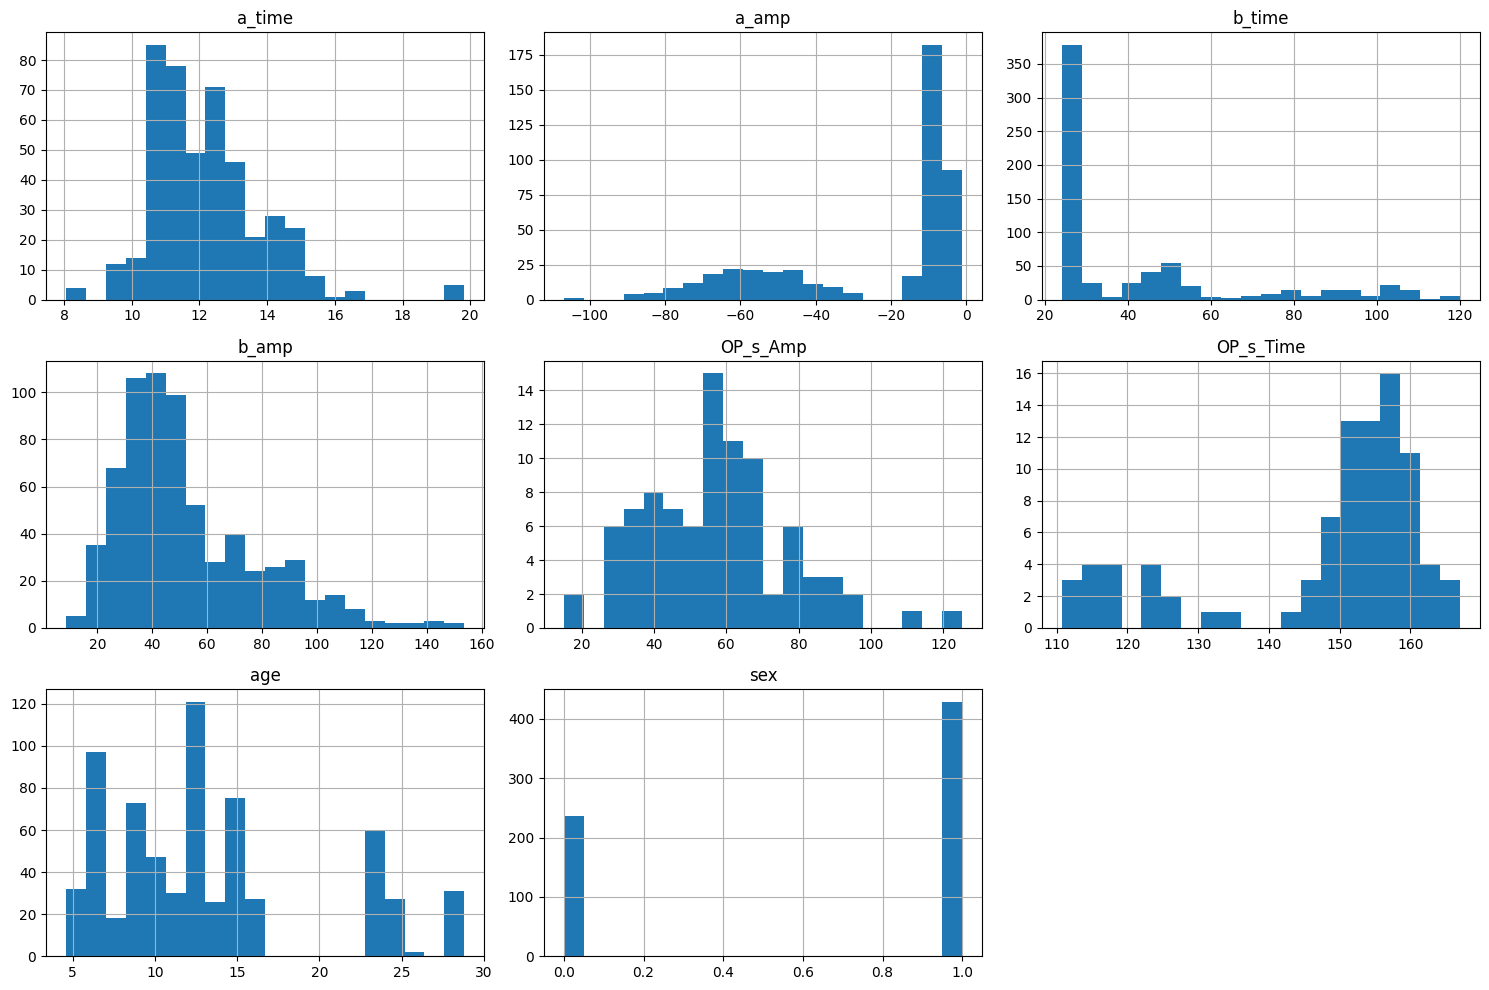

In [ ]:
data[relevant_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


Pairplot to visualize relationships between features

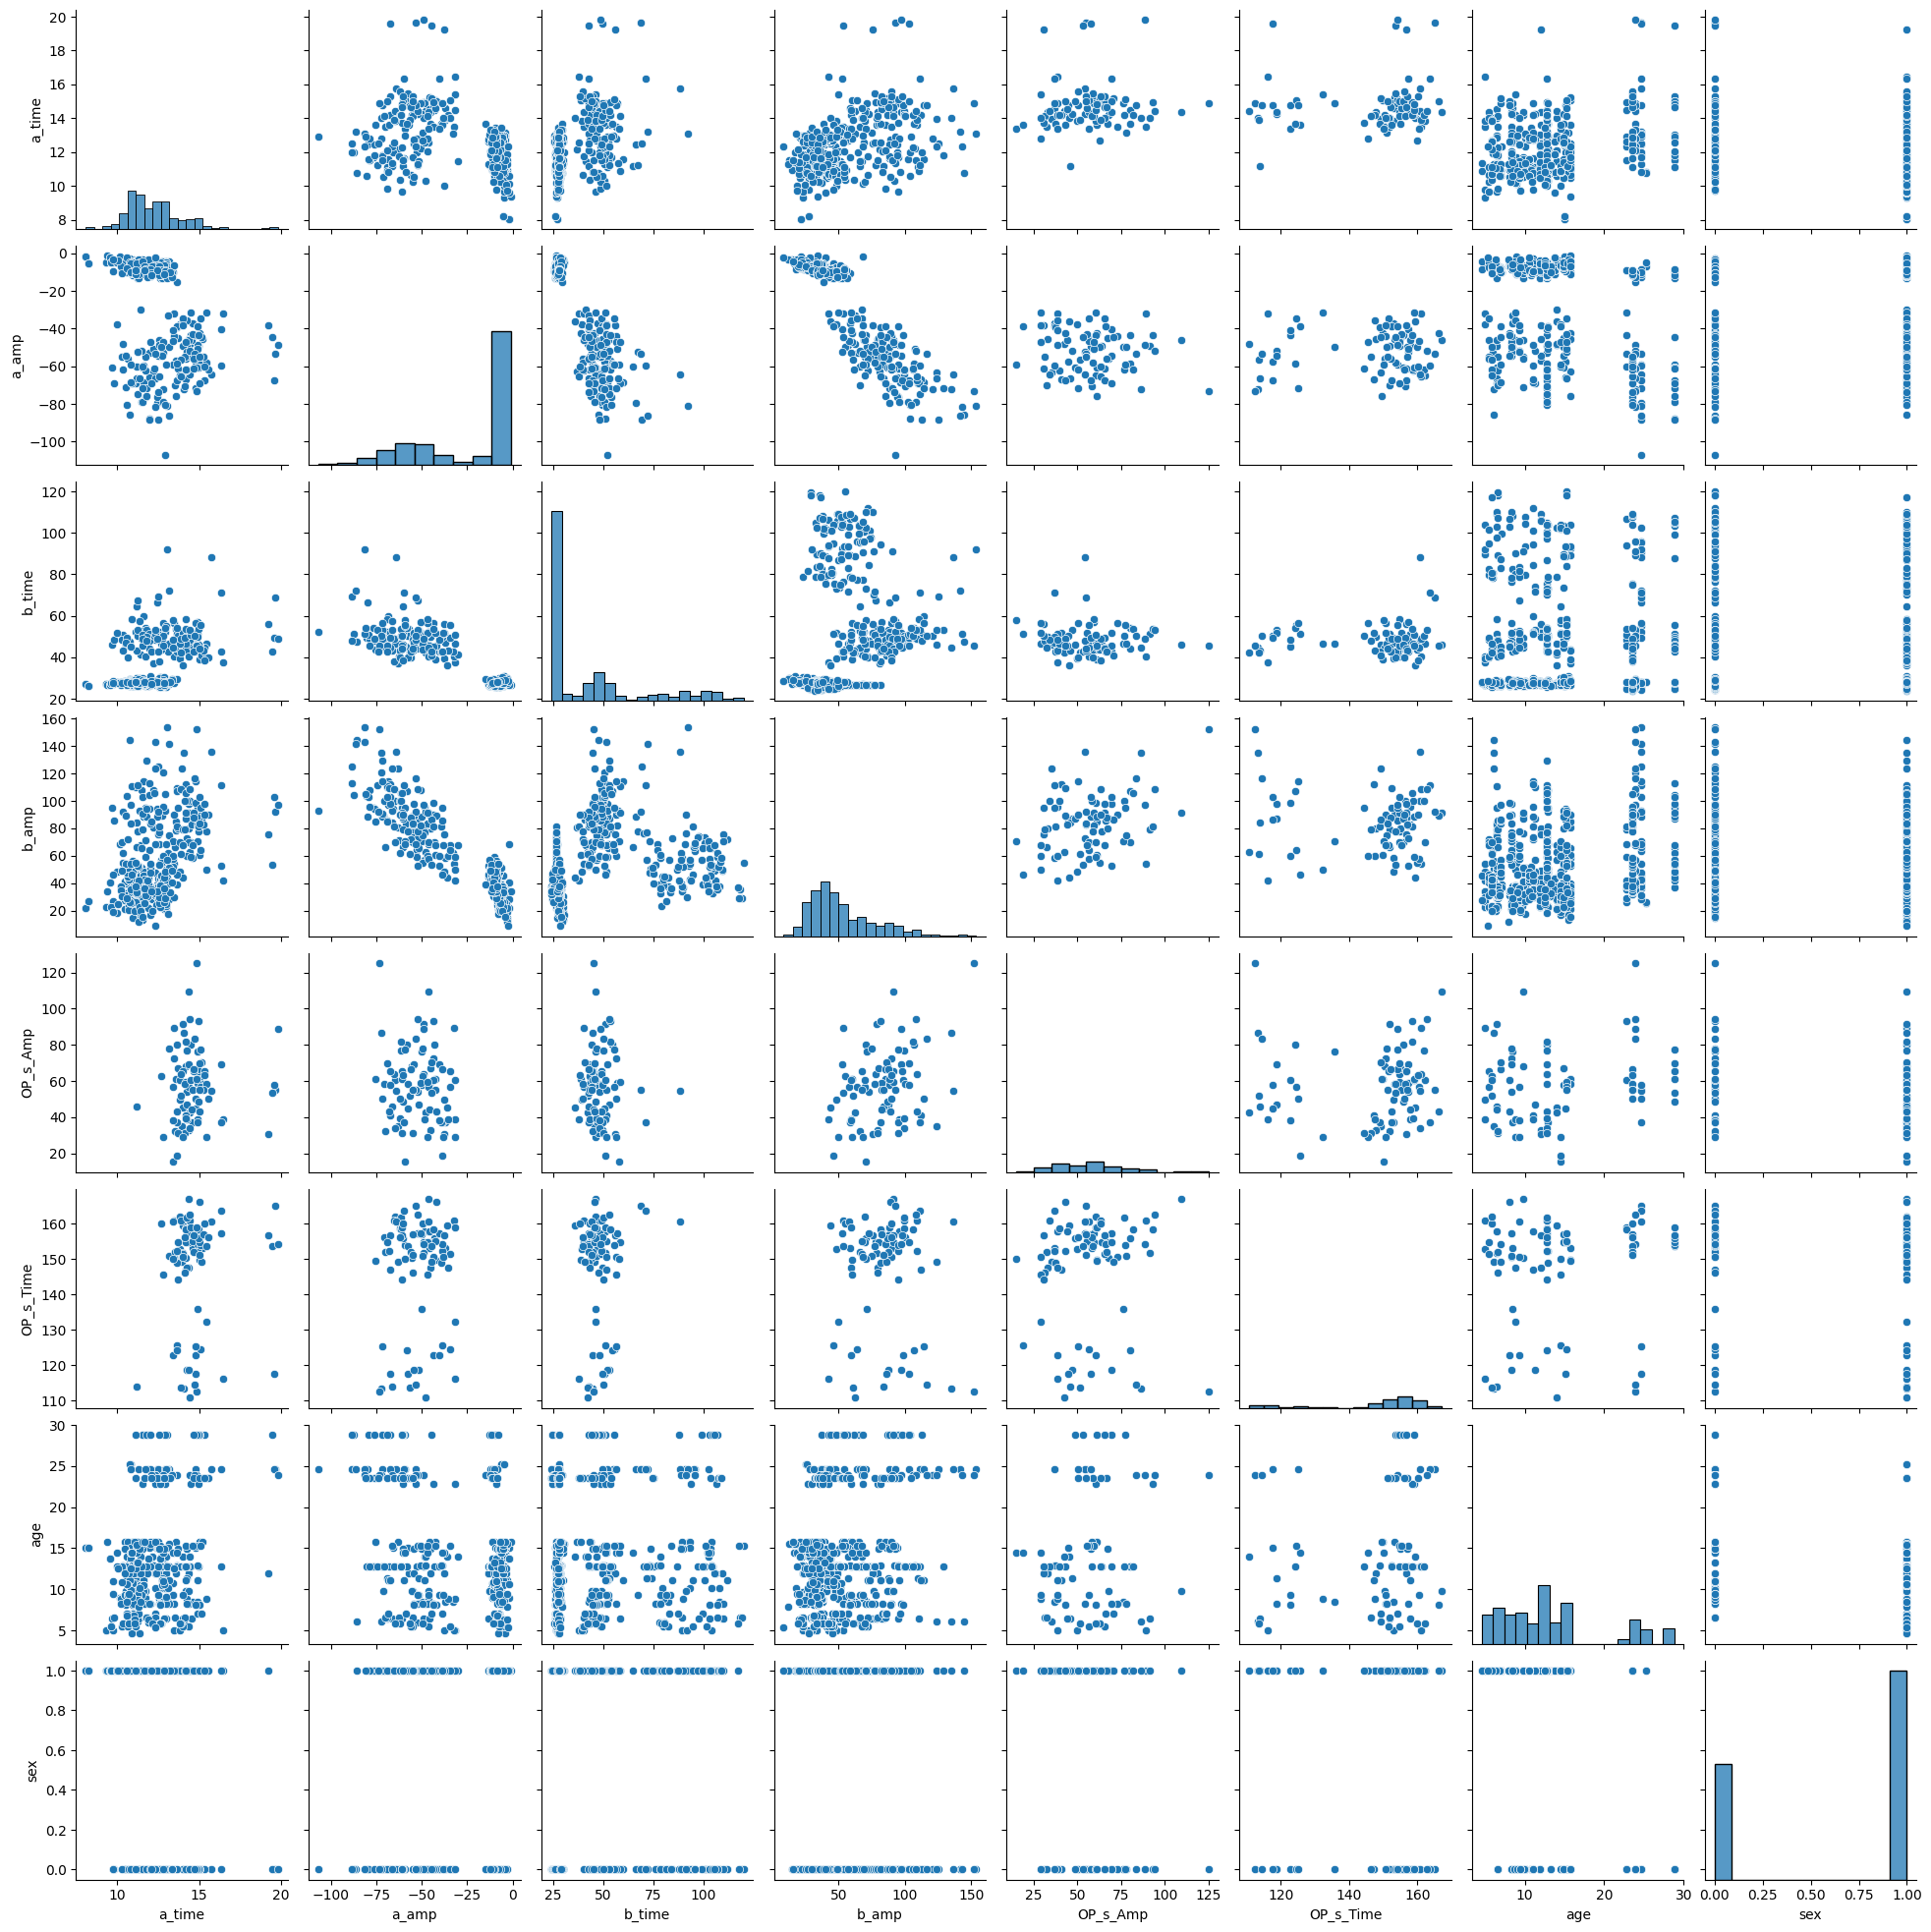

In [ ]:
sns.pairplot(data[relevant_features])
plt.show()

Correlation heatmap to identify relationships between features

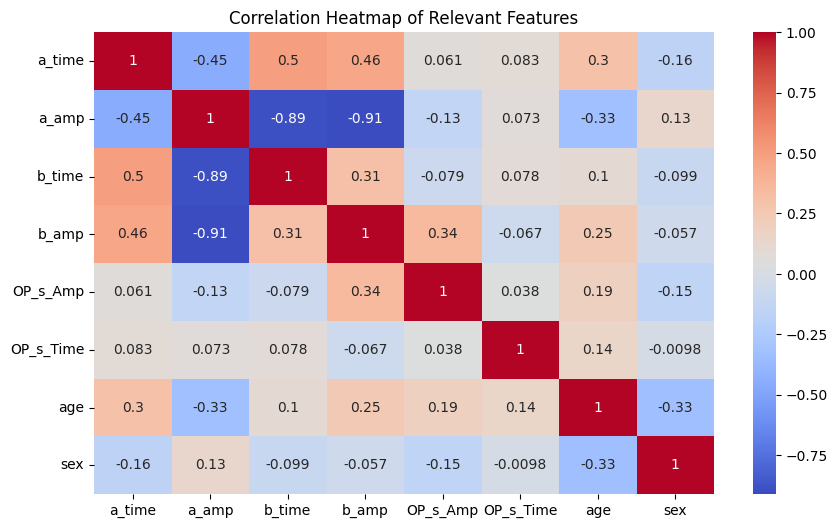

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[relevant_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Relevant Features')
plt.show()

Encode categorical variables if needed (e.g., 'sex', 'ethnic' etc.)
This is necessary for models like Random Forest that require numerical input

In [ ]:
label_encoders = {}
for column in ['sex', 'Ethnic']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

Check the data types to identify non-numeric columns

In [ ]:
print(data.dtypes)

id            object
Test          object
age          float64
Ethnic         int64
vert         float64
iris         float64
Eye           object
a_time       float64
a_amp        float64
b_time       float64
b_amp        float64
sex            int64
OP_s_Amp     float64
OP_s_Time    float64
dtype: object


Select only numeric columns for correlation

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

Check for any remaining non-numeric data issues

In [ ]:
print(numeric_data.head())

    age  Ethnic  vert      iris   a_time    a_amp     b_time    b_amp  sex  \
0  14.5       1   2.0  1.141572  11.3909 -5.23289  29.126900  16.7272    0   
1  14.5       1   2.0  1.153924  11.3463 -3.98402  29.985200  18.8737    0   
2   5.0       0   2.0  1.116472      NaN      NaN  26.763275  33.6818    1   
3   5.0       0   2.0  1.116472      NaN      NaN  26.763275  33.6818    1   
4   5.0       0   2.0  1.072432      NaN      NaN  26.763275  29.7059    1   

   OP_s_Amp  OP_s_Time  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  


Correlation Analysis with only numeric columns

Visualize correlation to identify which features might be less relevant

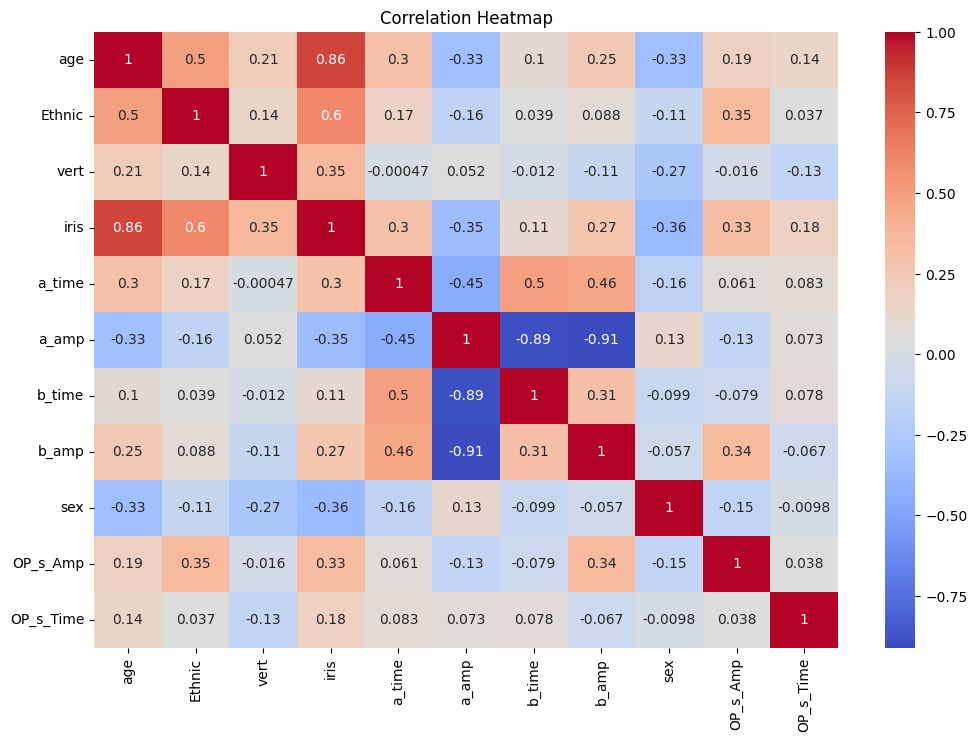

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Step 3: Create a New Dataset with Only Necessary Features

Select only the relevant features for the ML model

In [ ]:
new_data = data[relevant_features]

Save the new dataset to a CSV file

In [ ]:
new_data.to_csv('filtered_erg_data.csv', index=False)

Display the first few rows of the new dataset

In [ ]:
print(new_data.head())

    a_time    a_amp     b_time    b_amp  OP_s_Amp  OP_s_Time   age  sex
0  11.3909 -5.23289  29.126900  16.7272       NaN        NaN  14.5    0
1  11.3463 -3.98402  29.985200  18.8737       NaN        NaN  14.5    0
2      NaN      NaN  26.763275  33.6818       NaN        NaN   5.0    1
3      NaN      NaN  26.763275  33.6818       NaN        NaN   5.0    1
4      NaN      NaN  26.763275  29.7059       NaN        NaN   5.0    1


In [ ]:
# Remove rows with null values
filtered_data = new_data.dropna(subset=['a_time', 'a_amp', 'OP_s_Amp', 'OP_s_Time'])

# Save the updated dataset
filtered_data.to_csv('filtered_erg_data_cleaned.csv', index=False)


In [ ]:
# Mean imputation for numerical columns
filtered_data['a_time'].fillna(filtered_data['a_time'].mean(), inplace=True)
filtered_data['a_amp'].fillna(filtered_data['a_amp'].mean(), inplace=True)
filtered_data['OP_s_Amp'].fillna(filtered_data['OP_s_Amp'].mean(), inplace=True)
filtered_data['OP_s_Time'].fillna(filtered_data['OP_s_Time'].mean(), inplace=True)

# Save the updated dataset
filtered_data.to_csv('filtered_erg_data_imputed.csv', index=False)


<ipython-input-26-08de3881a6a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['a_time'].fillna(filtered_data['a_time'].mean(), inplace=True)
<ipython-input-26-08de3881a6a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['a_amp'].fillna(filtered_data['a_amp'].mean(), inplace=True)
<ipython-input-26-08de3881a6a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['OP_s_Amp'].fillna(filtered_da

In [ ]:
print(filtered_data.head())

# Add a unique patient ID column (if not already present)
if 'patient_id' not in filtered_data.columns:
    filtered_data.insert(0, 'patient_id', range(1, len(filtered_data) + 1))  # Adds a 'patient_id' starting from 1

# Check the updated dataset
print("\nUpdated Data Overview with Patient ID:")
print(filtered_data.head())

# Save the updated dataset with the new patient ID column
updated_filtered_data_path = 'updated_filtered_erg_data_with_patient_id.csv'
filtered_data.to_csv(updated_filtered_data_path, index=False)

print("\nUpdated dataset with unique patient IDs saved successfully.")

# Code to download the updated CSV file in Google Colab
from google.colab import files
files.download(updated_filtered_data_path)


     a_time    a_amp   b_time    b_amp  OP_s_Amp  OP_s_Time   age  sex
10  16.4672 -31.7371  37.7009  42.0027   38.6285    116.201   5.0    1
11  13.4700 -32.0674  40.5124  53.7180   89.0720    161.045   5.0    1
12  13.8496 -37.5048  39.2610  48.4090   49.8877    152.862   5.0    1
36  13.9874 -36.0437  36.0637  43.8649   45.1444    159.434  14.0    1
37  14.4105 -47.9692  42.1785  62.4470   42.4601    110.713  14.0    1

Updated Data Overview with Patient ID:
    patient_id   a_time    a_amp   b_time    b_amp  OP_s_Amp  OP_s_Time   age  \
10           1  16.4672 -31.7371  37.7009  42.0027   38.6285    116.201   5.0   
11           2  13.4700 -32.0674  40.5124  53.7180   89.0720    161.045   5.0   
12           3  13.8496 -37.5048  39.2610  48.4090   49.8877    152.862   5.0   
36           4  13.9874 -36.0437  36.0637  43.8649   45.1444    159.434  14.0   
37           5  14.4105 -47.9692  42.1785  62.4470   42.4601    110.713  14.0   

    sex  
10    1  
11    1  
12    1  
36    1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>